In [0]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Lazy courses/DS:Deep Learning in Python/NN -Fundamental concepts from scratch')

Reading in and transforming data
Cost / err at iteration i=0, j=0: 2436.182 / 0.889
Cost / err at iteration i=0, j=50: 438.614 / 0.114
Cost / err at iteration i=1, j=0: 350.359 / 0.083
Cost / err at iteration i=1, j=50: 293.982 / 0.067
Cost / err at iteration i=2, j=0: 272.168 / 0.059
Cost / err at iteration i=2, j=50: 254.507 / 0.058
Cost / err at iteration i=3, j=0: 245.712 / 0.051
Cost / err at iteration i=3, j=50: 235.676 / 0.046
Cost / err at iteration i=4, j=0: 233.485 / 0.046
Cost / err at iteration i=4, j=50: 226.497 / 0.042
Cost / err at iteration i=5, j=0: 226.771 / 0.041
Cost / err at iteration i=5, j=50: 220.446 / 0.036
Cost / err at iteration i=6, j=0: 223.188 / 0.038
Cost / err at iteration i=6, j=50: 218.080 / 0.036
Cost / err at iteration i=7, j=0: 223.266 / 0.036
Cost / err at iteration i=7, j=50: 216.614 / 0.032
Cost / err at iteration i=8, j=0: 223.971 / 0.035
Cost / err at iteration i=8, j=50: 216.729 / 0.032
Cost / err at iteration i=9, j=0: 225.957 / 0.035
Cost / 

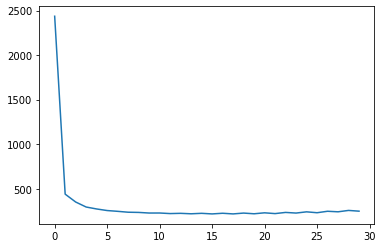

In [20]:
from __future__ import print_function, division
from builtins import range
import numpy as np
import tensorflow as tf
from util import get_normalized_data, y2indicator
import matplotlib.pyplot as plt

def error_rate(p,t):
    return np.mean(p != t)
    
def main():
    #get the data and and define all the variables
    Xtrain, Xtest, Ytrain, Ytest = get_normalized_data()

    max_iter = 15
    print_period = 50

    lr = 0.00004
    reg = 0.01

    Ytrain_ind = y2indicator(Ytrain)
    Ytest_ind = y2indicator(Ytest)

    N, D = Xtrain.shape
    batch_sz = 500
    n_batches = N // batch_sz

    #adding an extra layer

    M1 = 300
    M2 = 100
    K = 10
    W1_init = np.random.randn(D, M1) / np.sqrt(D)
    b1_init = np.zeros(M1)
    W2_init = np.random.randn(M1, M2) / np.sqrt(M1)
    b2_init = np.zeros(M2)
    W3_init = np.random.randn(M2, K) / np.sqrt(M2)
    b3_init = np.zeros(K)


    #define variables and expressions

    X = tf.placeholder(tf.float32, shape = (None, D), name = 'X')
    T = tf.placeholder(tf.float32, shape = (None, K), name = 'T')
    W1 = tf.Variable(W1_init.astype(np.float32))
    b1 = tf.Variable(b1_init.astype(np.float32))
    W2 = tf.Variable(W2_init.astype(np.float32))
    b2 = tf.Variable(b2_init.astype(np.float32))
    W3 = tf.Variable(W3_init.astype(np.float32))
    b3 = tf.Variable(b3_init.astype(np.float32))

    #define the model
    Z1 = tf.nn.relu(tf.matmul(X, W1) + b1)
    Z2 = tf.nn.relu(tf.matmul(Z1, W2) + b2)
    Yish = tf.matmul(Z2, W3) + b3 
    # the cost function does the softmax operation
    # softmax_cross_entropy_with_logits take in the logits

    cost  = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits_v2(logits=Yish, labels = T))

    #choosing the optimizer
    train_op = tf.train.RMSPropOptimizer(lr, decay=0.99, momentum=0.9).minimize(cost)

    #prediction
    predict_op = tf.argmax(Yish, 1)

    costs = []

    init = tf.global_variables_initializer()
    with tf.Session() as session:
        session.run(init)

        for i in range(max_iter):
            for j in range(n_batches):
                Xbatch = Xtrain[j*batch_sz:(j*batch_sz+batch_sz),]
                Ybatch = Ytrain_ind[j*batch_sz:(j*batch_sz+batch_sz),]

                session.run(train_op, feed_dict= {X: Xbatch, T: Ybatch})
                if j % print_period == 0:
                    test_cost = session.run(cost, feed_dict = {X:Xtest, T:Ytest_ind})
                    prediction = session.run(predict_op, feed_dict = {X:Xtest})
                    err = error_rate(prediction, Ytest)
                    #print("Cost / err at iteration i=%d: %.3f / %.3f" % (i, j, test_cost, err))
                    print("Cost / err at iteration i=%d, j=%d: %.3f / %.3f" % (i, j, test_cost, err))
                    costs.append(test_cost)
    plt.plot(costs)
    plt.show()

if __name__ == '__main__':
    main()